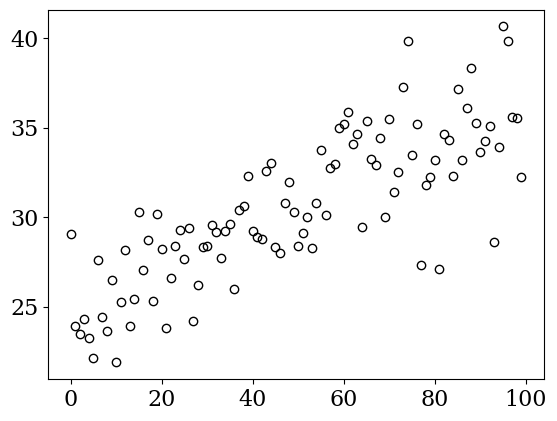

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator

noise = np.random.normal(1, 0.08, 100) # mean 1, spread 0.08, elements 100)

data_x = np.arange(0, 100)
data_y = np.linspace(25, 36, 100) * noise

# change the font globally

plt.rc("font", size=16, family='serif')

plt.plot(data_x, data_y, 'o', mec='k', color='None')

plt.show()

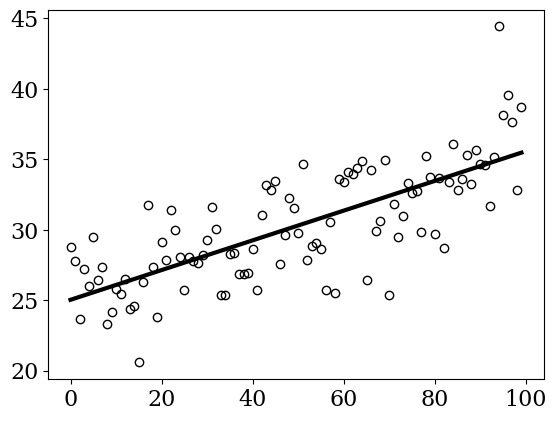

In [29]:
fit = np.polyfit(data_x, data_y, 1, cov=True) # linear
# first index takes fit params, m, b
# second index specifies cov matrix
best_fit_y = fit[0][0]*data_x + fit[0][1]

fig, ax = plt.subplots()
ax.plot(data_x, data_y, 'o', mec='k', color='None')
ax.plot(data_x, best_fit_y, 'k', lw=3)
plt.show()

In [10]:
cov = fit[1]
unc = np.sqrt(np.diagonal(cov))
print(f'Slope: {fit[0][0]:.4f} | Intercept: {fit[0][1]:.4f}')
print(f'Slope unc: {unc[0]:.4f} | Intercept unc: {unc[1]:.4f}')

Slope: 0.1103 | Intercept: 25.0060
Slope unc: 0.0090 | Intercept unc: 0.5157


In [12]:
from scipy.stats import multivariate_normal

fit_cov = multivariate_normal(mean=np.array([fit[0][0],fit[0][1]]), cov=cov)

In [15]:
# Some kind of "meshgrid" magic
x, y = np.mgrid[0.09:0.135:0.005,24:26.5:0.05]
pos = np.dstack((x, y))

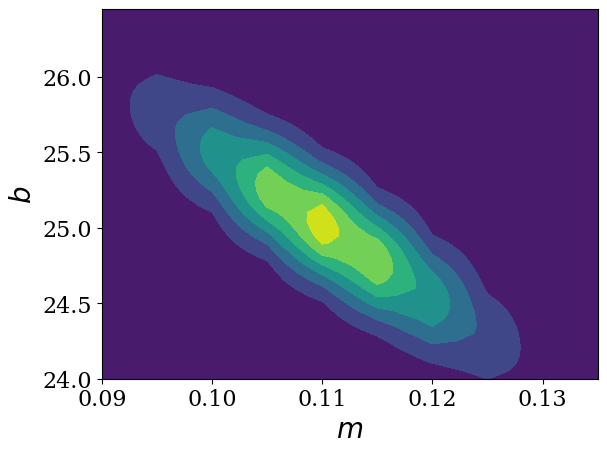

In [30]:
fig, ax = plt.subplots()
ax.contourf(x, y, fit_cov.pdf(pos))
ax.set_xlabel(r'$m$', fontsize=20)
ax.set_ylabel(r'$b$', fontsize=20)
plt.show()

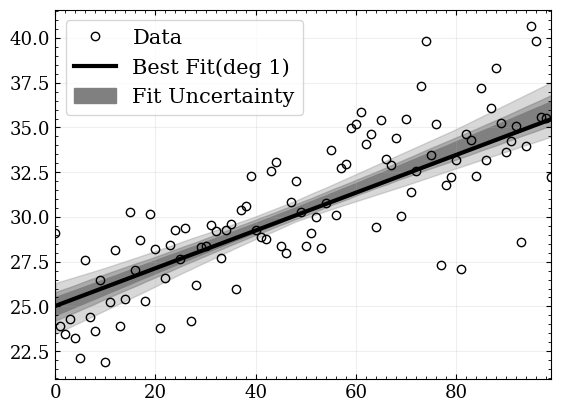

In [43]:
samples = fit_cov.rvs(size=500)
models = np.array([data_x*i[0]+i[1] for i in samples]).reshape(500, 100)
perc = np.percentile(models, [0.3, 5, 16, 84, 95, 99.7], axis=0)

fig, ax = plt.subplots()
ax.plot(data_x, data_y, 'o', mec='k', color='None', label='Data')
ax.plot(data_x, best_fit_y, 'k', lw=3, label='Best Fit(deg 1)')
ax.fill_between(data_x, y1=perc[0], y2=perc[-1], color='gray', alpha=0.3)
ax.fill_between(data_x, y1=perc[1], y2=perc[-2], color='gray', alpha=0.5)
ax.fill_between(data_x, y1=perc[2], y2=perc[3], color='gray', alpha=1, label='Fit Uncertainty')

XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(direction='in',
               which='both',
               top=True,
               right=True,
               labelsize=13)

ax.set_xlim(0,99)
ax.grid(alpha=0.2)
ax.legend(fontsize=15)
plt.show()